# Homework 03 - kNN

## 1. 想一想,如果输入的数据非常多,怎么快速进行距离计算?

示例代码在处理少量数据时，计算效率比较低的问题并不明显。当处理数据比较多时，计算时间会变得很长。考虑如下的改进：
* 增加样本数量，测试基本写法的计算时间；
* 考虑如何改进距离计算的效率；
* 使用优化的距离计算方法改进kNN，并对处理速度进行对比分析。

Method1: kd-tree
Method2: Fast Library for Approximate Nearest Neighbors (FLANN)
Method3: PyNNDescent for fast Approximate Nearest Neighbors

## 2. 如何选择最好的 k?

通过交叉验证（将样本数据按照一定比例，拆分出训练用的数据和验证用的数据，比如6：4拆分出部分训练数据和验证数据），从选取一个较小的 K 值开始，不断增加 K 的值，然后计算验证集合的方差，最终找到一个比较合适的 K 值。

## 3. kNN 存在的问题有哪些?如何改进算法?

缺点:
1.对内存要求较高，因为该算法存储了所有训练数据。
2.预测阶段可能很慢。
3.对不相关的功能和数据规模敏感。

## 自定义kNN算法

### 算法步骤：

输入：
* 训练数据： $T=\{(x_1,y_1),(x_2,y_2), ..., (x_N,y_N)\}$, 其中$x_i \in X=R^n$，$y_i \in Y = {0, 1, ..., K-1}$，i=1,2...N
* 用户输入数据：$x_u$

输出：预测的最优类别$y_{pred}$

1. 准备数据;
2. 计算测试数据与各个训练数据之间的**距离**(kNN算法中使用的是欧式距离，在多维空间中欧式距离计算公式如下：
$$
d(p, q) = \sqrt{ (p_1-q_1)^2 + (p_1-q_1)^2 + ... + (p_n-q_n)^2 } = \sqrt{ \sum_{i=1,n} (p_i-q_i)^2}
$$
3. 按照距离的递增关系进行排序；
4. 选取距离最小的`k`个点；
5. 确定前`k`个点所在类别的出现频率；
6. 返回前`k`个点中出现频率最高的类别作为测试数据的预测分类。

Reference: https://zhuanlan.zhihu.com/p/143092725

In [72]:
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

### Sample data

In [95]:
# 生成模拟数据
np.random.seed(314)

data_size1 = 1000
x1 = np.random.randn(data_size1, 2) + np.array([4,4])
y1 = np.zeros(shape=(data_size1,))

data_size2 = 1000
x2 = np.random.randn(data_size2, 2)*2 + np.array([10,10])
y2 = np.ones(shape=(data_size2,))

# 合并生成全部数据
x = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2), axis=0)

data_size_all = data_size1 + data_size2
shuffled_index = np.random.permutation(data_size_all)
x = x[shuffled_index]
y = y[shuffled_index]

# 分割训练与测试数据
split_index = int(data_size_all*0.7)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

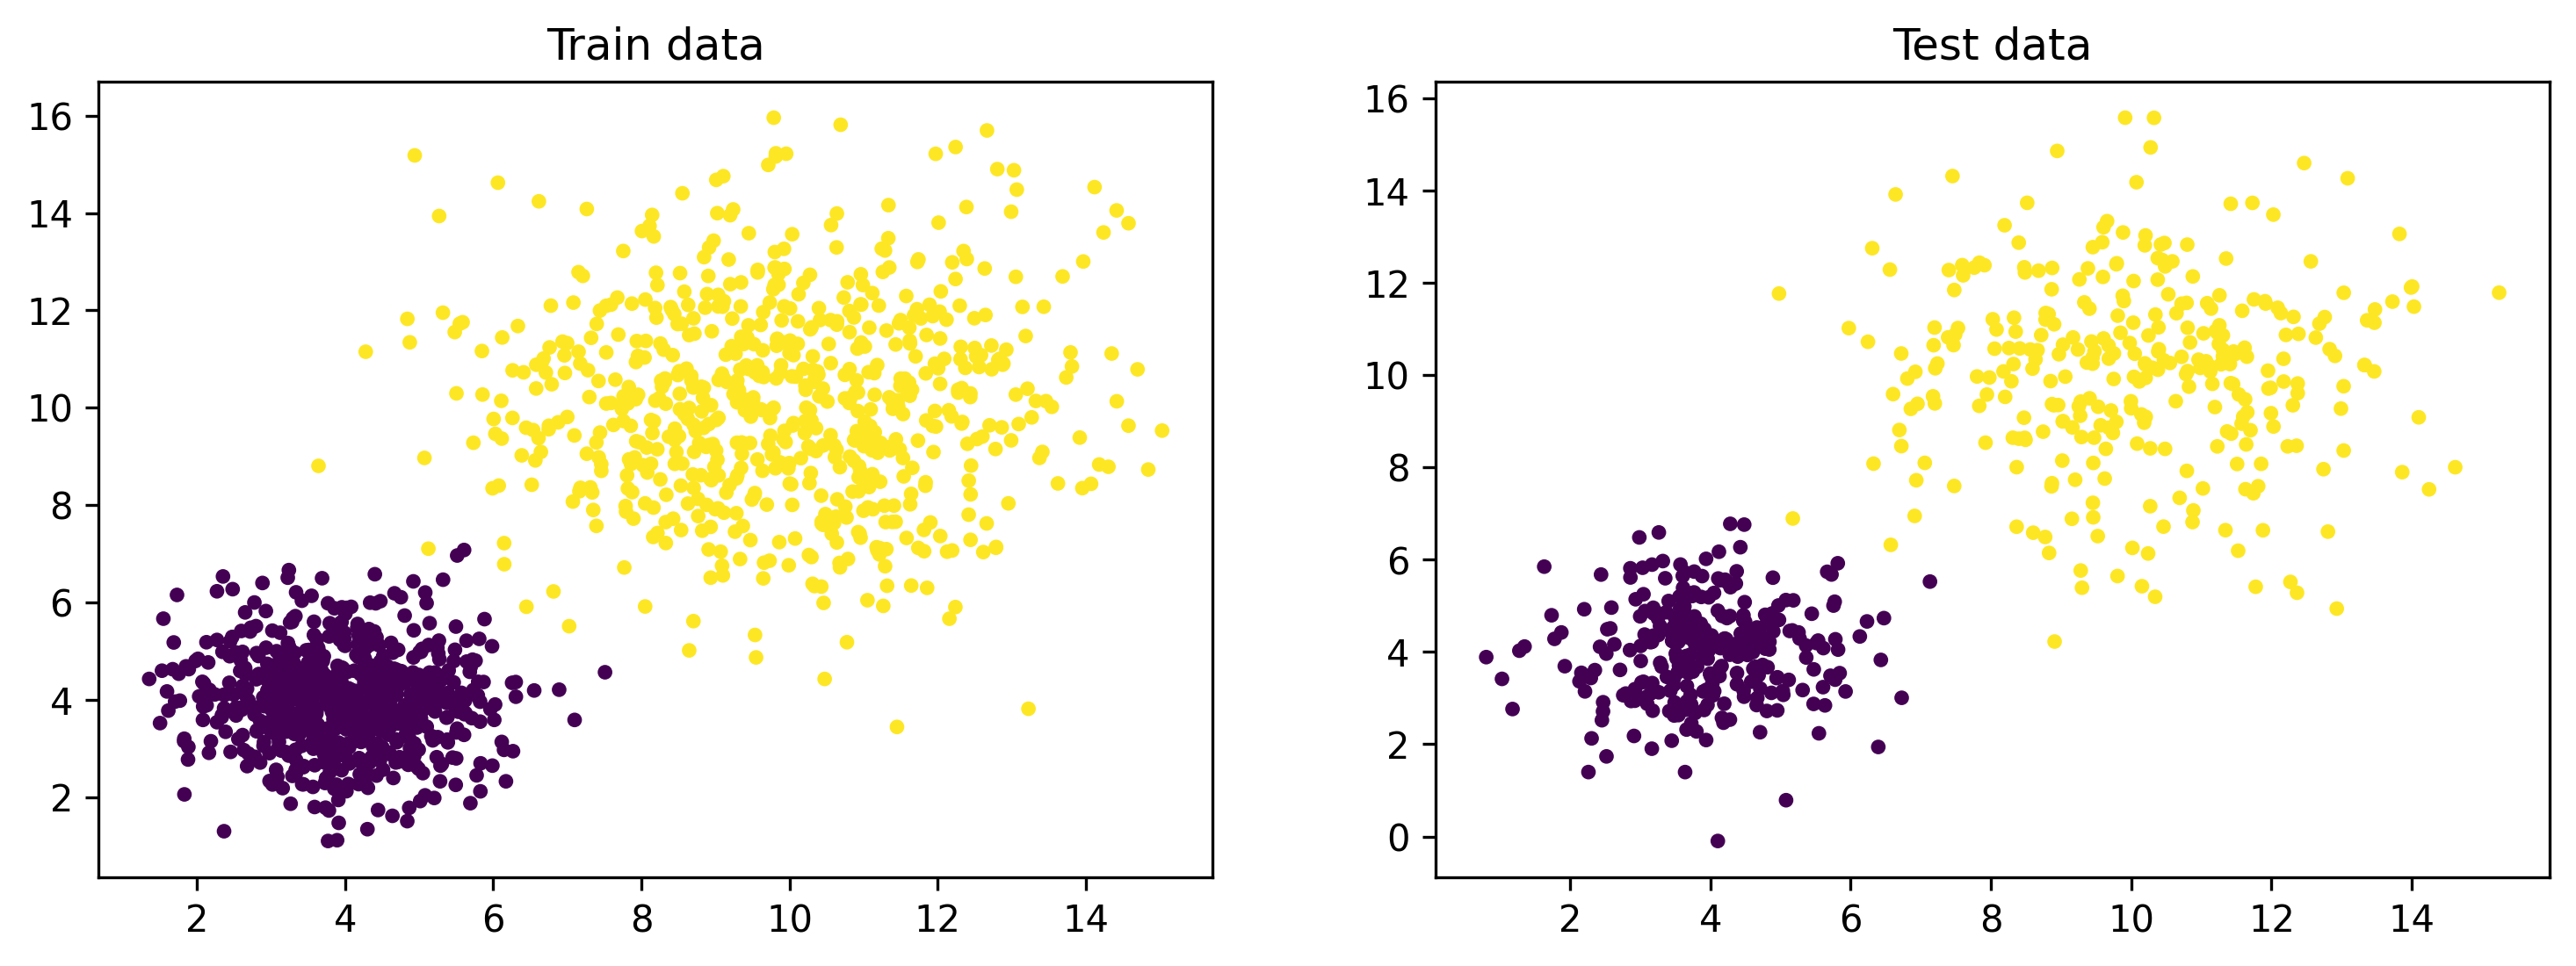

In [96]:
# 绘制结果
fig = plt.figure(figsize=(12, 4), dpi=300)
ax1 = plt.subplot(1,2,1)
ax1.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='.')
ax1.set_title("Train data")
ax2 = plt.subplot(1,2,2)
ax2.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='.')
ax2.set_title("Test data")
plt.show()

### kNN class

In [97]:
class KNN(object):

    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.x = x
        self.y = y
        return self

    def _square_distance(self, x):
        # Calculate Euclidean distance
        return cdist(XA=x, XB=self.x, metric = 'euclidean')

    def _vote(self, ys):
        # Get the largest number of elements in a list.
        ys = list(ys)
        return max(set(ys),key=ys.count)

    def predict(self, x):
        dist_arr = self._square_distance(x)
        top_k_index = np.argsort(dist_arr, axis=1)[:, :self.k]
        y_pred = [self._vote(ys=self.y[top_k_index[i]]) for i in range(len(x))]
        return np.array(y_pred)

    def score(self, y_true=None, y_pred=None):
        if y_true is None and y_pred is None:
            y_pred = self.predict(self.x)
            y_true = self.y
        compare_arr = y_pred == y_true
        score = len(y_true[compare_arr]) / len(y_true)
        return score

In [98]:
# knn classifier
clf = KNN(k=3)
train_acc = clf.fit(x_train, y_train).score() * 100.0

y_test_pred = clf.predict(x_test)
test_acc = clf.score(y_test, y_test_pred) * 100.0

print('train accuracy: %f %%' % train_acc)
print('test accuracy: %f %%' % test_acc)

train accuracy: 99.928571 %
test accuracy: 99.666667 %


### sklearn kNN class

In [102]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
print('train accuracy: %f %%' % (knn.fit(x_train, y_train).score(x_train, y_train) * 100.0))
print('test accuracy: %f %%' % (knn.fit(x_train, y_train).score(x_test, y_test) * 100.0))

train accuracy: 99.857143 %
test accuracy: 99.666667 %
